In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [3]:
import cv2 # For OpenCV modules (For Image I/O and Contour Finding)
import numpy as np # For general purpose array manipulation
import scipy.fftpack # For FFT2 

#### imclearborder definition

def imclearborder(imgBW, radius):

    # Given a black and white image, first find all of its contours
    imgBWcopy = imgBW.copy()
    contours,hierarchy = cv2.findContours(imgBWcopy.copy(), cv2.RETR_LIST, 
        cv2.CHAIN_APPROX_SIMPLE)

    # Get dimensions of image
    imgRows = imgBW.shape[0]
    imgCols = imgBW.shape[1]    

    contourList = [] # ID list of contours that touch the border

    # For each contour...
    for idx in np.arange(len(contours)):
        # Get the i'th contour
        cnt = contours[idx]

        # Look at each point in the contour
        for pt in cnt:
            rowCnt = pt[0][1]
            colCnt = pt[0][0]

            # If this is within the radius of the border
            # this contour goes bye bye!
            check1 = (rowCnt >= 0 and rowCnt < radius) or (rowCnt >= imgRows-1-radius and rowCnt < imgRows)
            check2 = (colCnt >= 0 and colCnt < radius) or (colCnt >= imgCols-1-radius and colCnt < imgCols)

            if check1 or check2:
                contourList.append(idx)
                break

    for idx in contourList:
        cv2.drawContours(imgBWcopy, contours, idx, (0,0,0), -1)

    return imgBWcopy

#### bwareaopen definition
def bwareaopen(imgBW, areaPixels):
    # Given a black and white image, first find all of its contours
    imgBWcopy = imgBW.copy()
    contours,hierarchy = cv2.findContours(imgBWcopy.copy(), cv2.RETR_LIST, 
        cv2.CHAIN_APPROX_SIMPLE)

    # For each contour, determine its total occupying area
    for idx in np.arange(len(contours)):
        area = cv2.contourArea(contours[idx])
        if (area >= 0 and area <= areaPixels):
            cv2.drawContours(imgBWcopy, contours, idx, (0,0,0), -1)

    return imgBWcopy

#### Main program



In [4]:
# Read in image
img = cv2.imread('D:/Bui Tuan/License Plate Recognition (NDBSX)/plate_car/plate_car/00003526_92C12684.jpg.jpg',0)
cv2.imshow('img', img)

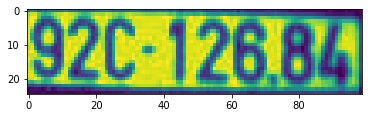

In [5]:
plt.imshow(img)
plt.show()

In [6]:
img.shape

(25, 99)

In [14]:
# Convert image to 0 to 1, then do log(1 + I)
imgLog = np.log1p(np.array(img, dtype="float") / 255)

# Create Gaussian mask of sigma = 10
M = 2*rows + 1
N = 2*cols + 1
sigma = 10
(X,Y) = np.meshgrid(np.linspace(0,N-1,N), np.linspace(0,M-1,M))
centerX = np.ceil(N/2)
centerY = np.ceil(M/2)
gaussianNumerator = (X - centerX)**2 + (Y - centerY)**2



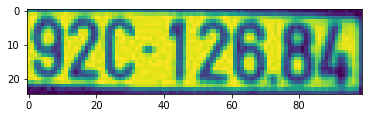

In [15]:
plt.imshow(imgLog)
plt.show()

In [16]:
print(imgLog)

[[0.32803337 0.35863381 0.31952268 ... 0.01169604 0.         0.03468556]
 [0.61146915 0.65109894 0.66329422 ... 0.04598511 0.         0.01169604]
 [0.64494508 0.69118447 0.69314718 ... 0.23638878 0.14231622 0.05344783]
 ...
 [0.17904823 0.17904823 0.21130909 ... 0.53866965 0.48701498 0.13549026]
 [0.         0.04223276 0.05344783 ... 0.40677144 0.38299225 0.04598511]
 [0.0039139  0.02325686 0.01169604 ... 0.14909591 0.15246859 0.01556452]]


In [17]:
print (M)

51


In [18]:
print(N)

199


In [19]:
# Low pass and high pass filters
Hlow = np.exp(-gaussianNumerator / (2*sigma*sigma))
Hhigh = 1 - Hlow



In [20]:
Hlow

array([[6.56690231e-24, 1.77616605e-23, 4.75623857e-23, ...,
        3.30974797e-22, 1.26095837e-22, 4.75623857e-23],
       [8.47433540e-24, 2.29207412e-23, 6.13774333e-23, ...,
        4.27110274e-22, 1.62721839e-22, 6.13774333e-23],
       [1.08269915e-23, 2.92840275e-23, 7.84171169e-23, ...,
        5.45685189e-22, 2.07896889e-22, 7.84171169e-23],
       ...,
       [1.71507556e-23, 4.63880662e-23, 1.24218515e-22, ...,
        8.64405711e-22, 3.29324054e-22, 1.24218515e-22],
       [1.36951565e-23, 3.70416232e-23, 9.91904988e-23, ...,
        6.90241980e-22, 2.62970598e-22, 9.91904988e-23],
       [1.08269915e-23, 2.92840275e-23, 7.84171169e-23, ...,
        5.45685189e-22, 2.07896889e-22, 7.84171169e-23]])

In [21]:
# Move origin of filters so that it's at the top left corner to
# match with the input image
HlowShift = scipy.fftpack.ifftshift(Hlow.copy())
HhighShift = scipy.fftpack.ifftshift(Hhigh.copy())



In [22]:
# Filter the image and crop
If = scipy.fftpack.fft2(imgLog.copy(), (M,N))
Ioutlow = scipy.real(scipy.fftpack.ifft2(If.copy() * HlowShift, (M,N)))
Iouthigh = scipy.real(scipy.fftpack.ifft2(If.copy() * HhighShift, (M,N)))



<ipython-input-22-20198025d7bd>:3: DeprecationWarning: scipy.real is deprecated and will be removed in SciPy 2.0.0, use numpy.real instead
  Ioutlow = scipy.real(scipy.fftpack.ifft2(If.copy() * HlowShift, (M,N)))
<ipython-input-22-20198025d7bd>:4: DeprecationWarning: scipy.real is deprecated and will be removed in SciPy 2.0.0, use numpy.real instead
  Iouthigh = scipy.real(scipy.fftpack.ifft2(If.copy() * HhighShift, (M,N)))


In [23]:
# Set scaling factors and add
gamma1 = 0.3
gamma2 = 1.5
Iout = gamma1*Ioutlow[0:rows,0:cols] + gamma2*Iouthigh[0:rows,0:cols]



In [24]:
# Anti-log then rescale to [0,1]
Ihmf = np.expm1(Iout)
Ihmf = (Ihmf - np.min(Ihmf)) / (np.max(Ihmf) - np.min(Ihmf))
Ihmf2 = np.array(255*Ihmf, dtype="uint8")



In [25]:
print(Ihmf)

[[0.48279476 0.48796155 0.40503072 ... 0.24580895 0.23615384 0.27570574]
 [0.79084302 0.78318436 0.74147979 ... 0.24108171 0.20453035 0.22631005]
 [0.8123432  0.81918879 0.76451355 ... 0.35856344 0.27851881 0.2123069 ]
 ...
 [0.32743358 0.29943119 0.31110985 ... 0.63222294 0.60693987 0.21212239]
 [0.21188209 0.24619053 0.24917962 ... 0.51687156 0.52636763 0.16752835]
 [0.24268608 0.26063064 0.2459091  ... 0.3052511  0.32788732 0.19951472]]


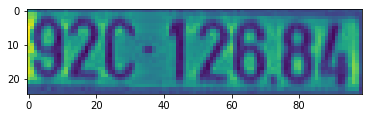

In [26]:
plt.imshow(Ihmf)
plt.show()

In [27]:
# Threshold the image - Anything below intensity 65 gets set to white
Ithresh = Ihmf2 < 65
Ithresh = 255*Ithresh.astype("uint8")



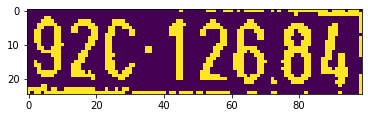

In [28]:
plt.imshow(Ithresh)
plt.show()

In [29]:
# Clear off the border.  Choose a border radius of 5 pixels
Iclear = imclearborder(Ithresh, 1.2)



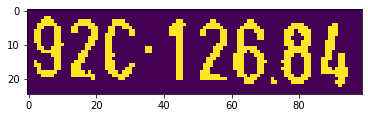

In [30]:
plt.imshow(Iclear)

In [31]:
# Eliminate regions that have areas below 120 pixels
Iopen = bwareaopen(Iclear, 2)

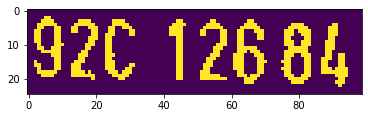

In [32]:
plt.imshow(Iopen)

In [33]:
Iopen

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [37]:
cv2.imwrite('D:\Bui Tuan\Iopen.jpg', Iopen)

True